# Exercício *Iris*

- 50 amostras de 3 espécies diferentes de íris (150 amostras no total)
- Medidas: comprimento da sépala, largura da sépala, comprimento da pétala, largura da pétala

![](https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/e43b96424ad781f57d492ce36351693aad01902a/images/03_iris.png)

## Aprendizado de máquina no conjunto de dados da íris

Enquadrado como um problema de **aprendizado supervisionado**: Preveja as espécies de uma íris usando as suas medidas. 

- Famoso conjunto de dados para aprendizado de máquina porque a previsão é **fácil**
- Saiba mais sobre o conjunto de dados da íris: [UCI Machine Learning Repository] (http://archive.ics.uci.edu/ml/datasets/Iris)
- Cada linha é uma **observação** (também conhecida como: exemplo, amostra, sample)
- Cada coluna é uma **feature** (também conhecido como: preditor, atributo, variável independente)
- Cada valor que estamos prevendo é a resposta (também conhecida como: target, outcome, label, dependent variable)
- A classificação é um aprendizado supervisionado no qual a resposta é categórica
- Regressão é a aprendizagem supervisionada em que a resposta é ordenada e contínua

# **Resolução do Exercício do Iris DataSet  **

**Importa a função train_test_split e cria variáveis de treinamento e de teste**   
X_train = 75 registros para treinamento (50%)  
X_test = 75 registros para testes (50%)  
y_train = 75 labels/targets para treinamento (50%)  
y_test = 75 registros para treinamento (50%)  

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import collections 
import numpy
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.5, random_state=42)

# **Crie um classificador capaz de separar as 3 classes de plantas.**

**Cria o classificador por SVM e treina com os datasets e labels de testes, e também mostra o score do modelo/classificador**

In [46]:
from sklearn import svm

classifier_svm = svm.SVC(probability=True)
classifier_svm.fit(X_train, y_train)
classifier_svm.score(X_test, y_test)


0.9866666666666667

# **Apresente as métricas de validação Matriz de Confusão, Precision/Recall, F1 e ROC para este classificador.**


**Importa a função plot_confusion_matrix **

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plota a matriz de confusão

Matriz que demonstra os resultados corretos e errados das previsões do modelo:


Confusion matrix, without normalization
[[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]


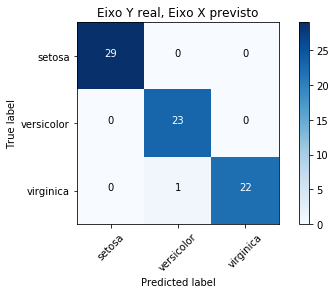

In [48]:

y_pred = classifier_svm.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

class_names = iris.target_names

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Eixo Y real, Eixo X previsto')

# Mostra precision/recall

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        29
 versicolor       0.96      1.00      0.98        23
  virginica       1.00      0.96      0.98        23

avg / total       0.99      0.99      0.99        75



# Mostra o score f1

In [50]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='macro')  )

0.9855003940110323


# Mostra o ROC

In [60]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


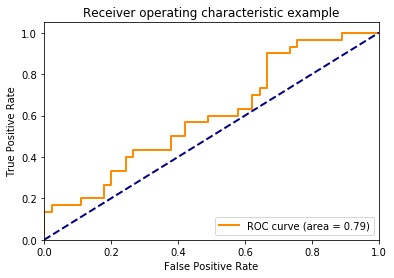

In [61]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()